# 1. 导入mnist数据

In [1]:
import numpy as np
import struct
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# 训练集文件
train_images_idx3_ubyte_file = 'Mnist_data/train-images.idx3-ubyte'
# 训练集标签文件
train_labels_idx1_ubyte_file = 'Mnist_data/train-labels.idx1-ubyte'

# 测试集文件
test_images_idx3_ubyte_file = 'Mnist_data/t10k-images.idx3-ubyte'
# 测试集标签文件
test_labels_idx1_ubyte_file = 'Mnist_data/t10k-labels.idx1-ubyte'

In [3]:
def decode_idx3_ubyte(idx3_ubyte_file):
    """
    解析idx3文件的通用函数
    :param idx3_ubyte_file: idx3文件路径
    :return: 数据集
    """
    # 读取二进制数据
    bin_data = open(idx3_ubyte_file, 'rb').read()

    # 解析文件头信息，依次为魔数、图片数量、每张图片高、每张图片宽
    offset = 0
    fmt_header = '>iiii' #因为数据结构中前4行的数据类型都是32位整型，所以采用i格式，但我们需要读取前4行数据，所以需要4个i。我们后面会看到标签集中，只使用2个ii。
    magic_number, num_images, num_rows, num_cols = struct.unpack_from(fmt_header, bin_data, offset)
    print('魔数:%d, 图片数量: %d张, 图片大小: %d*%d' % (magic_number, num_images, num_rows, num_cols))

    # 解析数据集
    image_size = num_rows * num_cols
    offset += struct.calcsize(fmt_header)  #获得数据在缓存中的指针位置，从前面介绍的数据结构可以看出，读取了前4行之后，指针位置（即偏移位置offset）指向0016。
    print(offset)
    fmt_image = '>' + str(image_size) + 'B'  #图像数据像素值的类型为unsigned char型，对应的format格式为B。这里还有加上图像大小784，是为了读取784个B格式数据，如果没有则只会读取一个值（即一副图像中的一个像素值）
    print(fmt_image,offset,struct.calcsize(fmt_image))
    images = np.empty((num_images, num_rows, num_cols))
    #plt.figure()
    for i in range(num_images):
        if (i + 1) % 10000 == 0:
            print('已解析 %d' % (i + 1) + '张')
            print(offset)
        images[i] = np.array(struct.unpack_from(fmt_image, bin_data, offset)).reshape((num_rows, num_cols))
        #print(images[i])
        offset += struct.calcsize(fmt_image)
#        plt.imshow(images[i],'gray')
#        plt.pause(0.00001)
#        plt.show()
    #plt.show()

    return images

In [4]:
def decode_idx1_ubyte(idx1_ubyte_file):
    """
    解析idx1文件的通用函数
    :param idx1_ubyte_file: idx1文件路径
    :return: 数据集
    """
    # 读取二进制数据
    bin_data = open(idx1_ubyte_file, 'rb').read()

    # 解析文件头信息，依次为魔数和标签数
    offset = 0
    fmt_header = '>ii'
    magic_number, num_images = struct.unpack_from(fmt_header, bin_data, offset)
    print('魔数:%d, 图片数量: %d张' % (magic_number, num_images))

    # 解析数据集
    offset += struct.calcsize(fmt_header)
    fmt_image = '>B'
    labels = np.empty(num_images)
    for i in range(num_images):
        if (i + 1) % 10000 == 0:
            print ('已解析 %d' % (i + 1) + '张')
        labels[i] = struct.unpack_from(fmt_image, bin_data, offset)[0]
        offset += struct.calcsize(fmt_image)
    return labels


In [5]:
def load_train_images(idx_ubyte_file=train_images_idx3_ubyte_file):
    """
    TRAINING SET IMAGE FILE (train-images-idx3-ubyte):
    [offset] [type]          [value]          [description]
    0000     32 bit integer  0x00000803(2051) magic number
    0004     32 bit integer  60000            number of images
    0008     32 bit integer  28               number of rows
    0012     32 bit integer  28               number of columns
    0016     unsigned byte   ??               pixel
    0017     unsigned byte   ??               pixel
    ........
    xxxx     unsigned byte   ??               pixel
    Pixels are organized row-wise. Pixel values are 0 to 255. 0 means background (white), 255 means foreground (black).

    :param idx_ubyte_file: idx文件路径
    :return: n*row*col维np.array对象，n为图片数量
    """
    return decode_idx3_ubyte(idx_ubyte_file)

In [6]:
def load_train_labels(idx_ubyte_file=train_labels_idx1_ubyte_file):
    """
    TRAINING SET LABEL FILE (train-labels-idx1-ubyte):
    [offset] [type]          [value]          [description]
    0000     32 bit integer  0x00000801(2049) magic number (MSB first)
    0004     32 bit integer  60000            number of items
    0008     unsigned byte   ??               label
    0009     unsigned byte   ??               label
    ........
    xxxx     unsigned byte   ??               label
    The labels values are 0 to 9.

    :param idx_ubyte_file: idx文件路径
    :return: n*1维np.array对象，n为图片数量
    """
    return decode_idx1_ubyte(idx_ubyte_file)

In [7]:
def load_test_images(idx_ubyte_file=test_images_idx3_ubyte_file):
    """
    TEST SET IMAGE FILE (t10k-images-idx3-ubyte):
    [offset] [type]          [value]          [description]
    0000     32 bit integer  0x00000803(2051) magic number
    0004     32 bit integer  10000            number of images
    0008     32 bit integer  28               number of rows
    0012     32 bit integer  28               number of columns
    0016     unsigned byte   ??               pixel
    0017     unsigned byte   ??               pixel
    ........
    xxxx     unsigned byte   ??               pixel
    Pixels are organized row-wise. Pixel values are 0 to 255. 0 means background (white), 255 means foreground (black).

    :param idx_ubyte_file: idx文件路径
    :return: n*row*col维np.array对象，n为图片数量
    """
    return decode_idx3_ubyte(idx_ubyte_file)

In [8]:
def load_test_labels(idx_ubyte_file=test_labels_idx1_ubyte_file):
    """
    TEST SET LABEL FILE (t10k-labels-idx1-ubyte):
    [offset] [type]          [value]          [description]
    0000     32 bit integer  0x00000801(2049) magic number (MSB first)
    0004     32 bit integer  10000            number of items
    0008     unsigned byte   ??               label
    0009     unsigned byte   ??               label
    ........
    xxxx     unsigned byte   ??               label
    The labels values are 0 to 9.

    :param idx_ubyte_file: idx文件路径
    :return: n*1维np.array对象，n为图片数量
    """
    return decode_idx1_ubyte(idx_ubyte_file)


In [9]:
train_images = load_train_images()
train_labels = load_train_labels()
test_images = load_test_images()
test_labels = load_test_labels()

魔数:2051, 图片数量: 60000张, 图片大小: 28*28
16
>784B 16 784
已解析 10000张
7839232
已解析 20000张
15679232
已解析 30000张
23519232
已解析 40000张
31359232
已解析 50000张
39199232
已解析 60000张
47039232
魔数:2049, 图片数量: 60000张
已解析 10000张
已解析 20000张
已解析 30000张
已解析 40000张
已解析 50000张
已解析 60000张
魔数:2051, 图片数量: 10000张, 图片大小: 28*28
16
>784B 16 784
已解析 10000张
7839232
魔数:2049, 图片数量: 10000张
已解析 10000张


# 2.对数据进行测试

In [10]:
print(len(train_images),len(train_labels),len(test_images),len(test_labels))

60000 60000 10000 10000


In [11]:
train_images.shape

(60000, 28, 28)

In [12]:
train_labels.shape

(60000,)

In [13]:
def plot_digit(data):
    image = data.reshape(28,28)
    plt.imshow(image,cmap = mpl.cm.binary)
    # plt.axis("off")


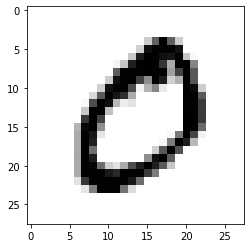

In [14]:
plot_digit(train_images[1])

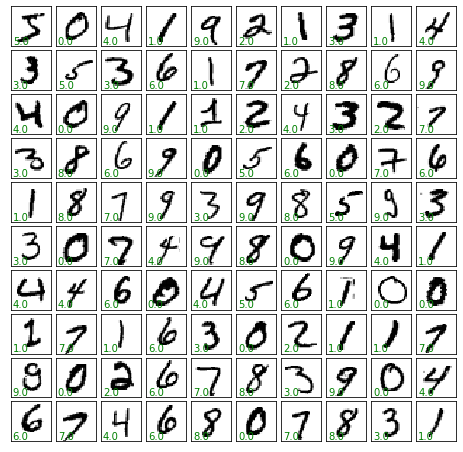

In [15]:
fig, axes = plt.subplots(10,10,figsize = (8,8),subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(train_images[i],cmap='binary', interpolation='nearest')
    ax.text(0.05,0.05,str(train_labels[i]),transform=ax.transAxes, color='green')

In [16]:
#将28*28拓展成一维矩阵，slearn可以处理
nsamples_tr, nx_tr, ny_tr = train_images.shape
d2_train_images = train_images.reshape((nsamples_tr,nx_tr*ny_tr))

nsamples_te, nx_te, ny_te = test_images.shape
d2_test_images = test_images.reshape((nsamples_te,nx_te*ny_te))

x_train = d2_train_images
y_train = train_labels

x_test = d2_test_images
y_test = test_labels


In [17]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


In [18]:
##我们还需要对训练集进行洗牌，这样可以保证交叉验证的时候，所有的折叠都差不多。此外，有些机器学习算法对训练示例的循序敏感，如果连续输入许多相似的实例，可能导致执行的性能不佳。给数据洗牌，正是为了确保这种情况不会发生。
import numpy as np

shuffer_index = np.random.permutation(60000)
x_train,y_train = x_train[shuffer_index],y_train[shuffer_index]


# 3. 二分类器(https://blog.csdn.net/qq_41133375/article/details/105798898)

In [19]:
##训练二分类器，尝试识别一个数字5
#先为此分类任务创建目录标量(将数字标签转换为bool型标签true代表 5，false代表 非5)：
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

##接着挑选一个分类器并开始训练。一个好的选择是随机梯度下降(SGD)分类器，使用sklearn的SGDClassifier类即可。这个分类器的优势是：能够有效处理非常大型的数据集。这部分是因为SGD独立处理训练实例，一次一个(这也使得SGD非常适合在线学习任务)。此时先创建一个SGDClassifier并在整个训练集上进行训练：
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5,tol=-np.infty,random_state=42)
sgd_clf.fit(x_train,y_train_5)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [20]:
print(sgd_clf.predict(x_test[:2]))
print(y_test[:2])

[False False]
[7. 2.]


## 3.1 分类器的性能考核

In [22]:
#1.使用交叉验证测量精度交叉验证是一个评估模型的好办法
#随机交叉验证和分层交叉验证效果对比
from sklearn.model_selection import cross_val_score
print(cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy"))

[0.9659  0.9598  0.94555]


In [23]:
## 分层交叉验证
# 类似于分层采样，每一折的分布类似
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(x_train, y_train_5):
    clone_clf = clone(sgd_clf)
    x_train_folds = x_train[train_index]
    y_train_folds = (y_train_5[train_index])
    x_test_fold = x_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(x_train_folds, y_train_folds)
    y_pred = clone_clf.predict(x_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

#这是因为只有大约10%的图像是数字5，所以如果你猜一张图不是5，90%的情况你都是正确的，这说明准确率通常无法成为分类器的首要性能指标，特别是当你处理偏斜数据集（skewed dataset）的时候（即某些类比其他类更为频繁）


0.9659
0.9598
0.94555


Text(91.68, 0.5, 'true value')

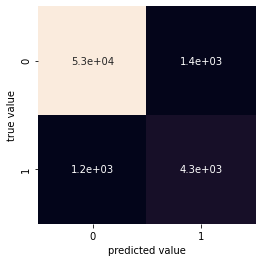

In [26]:
# 2.混淆矩阵
#评估分类器性能的更好的方法是混淆矩阵。总体思路就是统计A类别实例被分成B类别的次数。例如，要想知道分类器将数字3和数字5混淆多少次，只需要通过混淆矩阵的第5行第3列来查看。要计算混淆矩阵，需要一组预测才能将其与实际目标进行比较。当然可以通过测试集来进行预测，但是现在我们不动它(测试集最好保留到项目的最后,准备启动分类器时再使用)。
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,x_train,y_train_5,cv=3)

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_train_5,y_train_pred)

import seaborn as sns

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')


In [27]:
##3.精度和召回率，使用sklearn的工具度量精度和召回率
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))

#精度和召回率组合成单一的指标，称为F1分数。
from sklearn.metrics import f1_score

print(f1_score(y_train_5, y_train_pred))


0.7504399859204506
0.7865707434052758
0.7680806989102044


In [32]:
# 4.精度/召回率权衡,计算所有可能的阈值的精度和召回率
y_scores = sgd_clf.decision_function(x_test[:1])
y_scores

array([-369135.23348396])

In [33]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [34]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred


array([False])

In [36]:
# 返回决策分数，而不是预测结果
y_scores = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3,
                             method="decision_function")
y_scores.shape


(60000,)

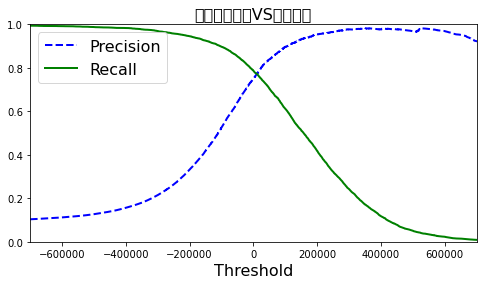

In [37]:
#计算所有可能的阈值的精度和召回率
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.title("精度和召回率VS决策阈值", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.show()


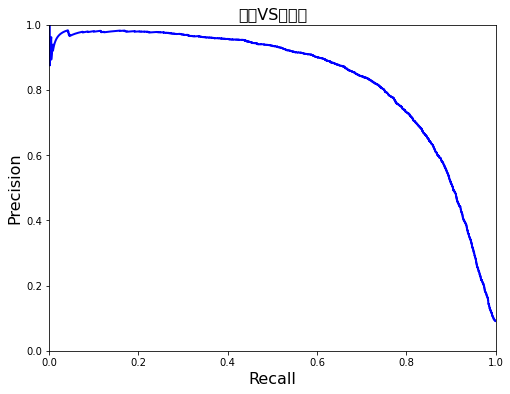

In [38]:
#现在就可以轻松通过选择阈值来实现最佳的精度/召回率权衡了。还有一种找到最好的精度/召回率权衡的方法是直接绘制精度和召回率的函数图。
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.title("精度VS召回率", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()


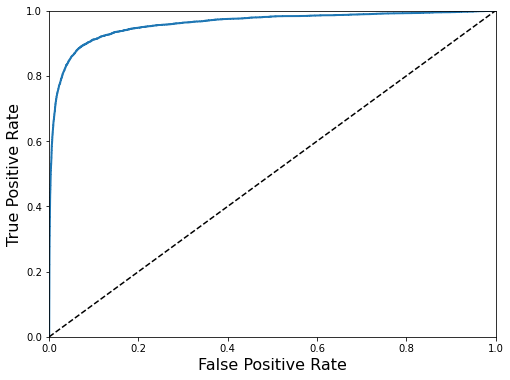

In [39]:
#5. ROC 曲线
#还有一种经常与二元分类器一起使用的工具，叫做受试者工作特征曲线(简称ROC)。它与精度/召回率曲线非常相似，但绘制的不是精度和召回率，而是真正类率(召回率的另一种称呼)和假正类率(FPR)。FPR是被错误分为正类的负类实例比率。

# 使用 roc_curve()函数计算多种阈值的TPR和FPR
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()


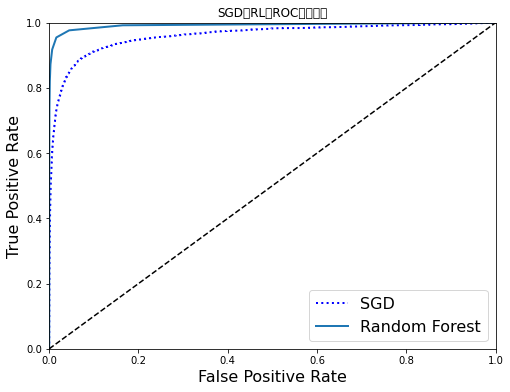

In [41]:
#6. 应用：训练一个随机森林分类器，并计算ROC和ROC AUC分数
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=10,random_state=42)
y_probas_forest = cross_val_predict(forest_clf,x_train,y_train_5,cv=3,method = "predict_proba")

y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, "b:", linewidth = 2,label = "SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")

plt.title("SGD与RL的ROC曲线对比")
plt.legend(loc = "lower right", fontsize = 16)
plt.show()

# 4. 多类别分类器

In [42]:
# 二元分类器在两个类别中区分，而多类别分类器(也称为多项分类器),可以区分两个以上的类别。
# 随机森林算法和朴素贝叶斯分类器可以直接处理多个类别。也有一些严格的二元分类器，比如支持向量分类器或线性分类器。但有多种策略，可以让我们用几个二元二类器实现多类别分类的目的
# 例如：我们可以训练0-9的10个二元分类器组合，那个分类器给的高，就分为哪一类，这称为一对多(OvA)策略
# 另一种方法，是为每一对数字训练一个二元分类器:一个用来区分0-1，一个区分0-2，一个区分1-2，依次类推。这称为一对一(OvO)策略，解决N分类，需要(N)*(N-1)/2分类器，比如MNIST问题，需要45个分类器。OvO的主要优点在于每个分类器只需要用到部分训练集对其必须区分的两个类别进行训练。
# 有些算法(例如支持向量机算法)，在数据规模增大时，表现糟糕，因此对于这类算法，OvO是一个优秀的选择，由于在较小的训练集上分别训练多个分类器比在大型数据集上训练少数分类器要快得多。但对于大多数二元分类器，OvA策略还是更好的选择。

# 使用0-9进行训练，在sgd内部，sklearn使用了10个二元分类器，
#获得它们对图片的决策分数，然后选择最高的类别
sgd_clf.fit(x_train, y_train)
sgd_clf.predict(x_test[:1])


array([7.])

In [43]:
#我们可以看到 sgd对输入的结果输出了10个预测分数，而不是1个，显示最大的预测分数。
some_digit_scores = sgd_clf.decision_function(x_test[:1])
print(some_digit_scores)
print(np.argmax(some_digit_scores))

[[-479953.96273751 -848360.82933539 -370578.40544982 -226244.85999664
  -542156.8856466  -365109.90164424 -701063.51732297  330570.27723574
  -316880.0864208  -248239.79038919]]
7


In [44]:
#训练分类器的时候，目标类别的列表会存储在classes_这个属性中，按值的大小进行排序：
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [45]:
#强制使用OVO策略
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, tol=-np.infty, random_state=42))
ovo_clf.fit(x_train, y_train)
ovo_clf.predict(x_test[:1])

array([7.])

In [46]:
len(ovo_clf.estimators_)

45

In [47]:
#随机森林的多分类，不需要OvA或者OVO策略
forest_clf.fit(x_train,y_train)
print(forest_clf.predict(x_test[:1]))
print(forest_clf.predict_proba(x_test[:1]))


[7.]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [49]:
y_test[:1]

array([7.])

In [51]:
#对分类器进行评估
cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring="accuracy")

array([0.8736 , 0.87455, 0.87645])

In [52]:
cross_val_score(forest_clf, x_train, y_train, cv=3, scoring="accuracy")

array([0.93915, 0.9348 , 0.943  ])

In [53]:
#使用标准化进行简单缩放，提高分类器评估效果
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))
print(cross_val_score(sgd_clf, x_train_scaled, y_train, cv=3, scoring="accuracy"))
print(cross_val_score(forest_clf, x_train_scaled, y_train, cv=3, scoring="accuracy"))

[0.90605 0.9112  0.912  ]
[0.9392  0.93495 0.94325]


## 4.1 错误分析

In [54]:
#做项目应遵循机器学习项目清单的步骤:探索数据准备的选项，尝试多个模型，列出最佳模型并使用GridSearchCV对超参数进行微调，尽可能自动化，等等。假设我们已经找到一个有潜力的模型，现在希望找到一些方法，对其进一步改进。方法之一就是分析其类型错误。

# 首先，看一下混淆矩阵
y_train_pred = cross_val_predict(sgd_clf, x_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5747,    2,   19,   11,    9,   40,   47,    9,   36,    3],
       [   1, 6460,   51,   26,    7,   44,    8,    8,  125,   12],
       [  55,   39, 5343,  104,   79,   23,   91,   61,  149,   14],
       [  41,   43,  139, 5362,    2,  224,   34,   53,  131,  102],
       [  16,   26,   35,    6, 5351,    9,   51,   31,   92,  225],
       [  75,   42,   36,  196,   76, 4580,  116,   24,  178,   98],
       [  36,   23,   49,    2,   44,   91, 5626,    7,   40,    0],
       [  30,   22,   66,   31,   58,    9,    6, 5774,   16,  253],
       [  54,  142,   72,  161,   12,  153,   59,   25, 5014,  159],
       [  43,   33,   25,   80,  151,   36,    1,  175,   77, 5328]],
      dtype=int64)

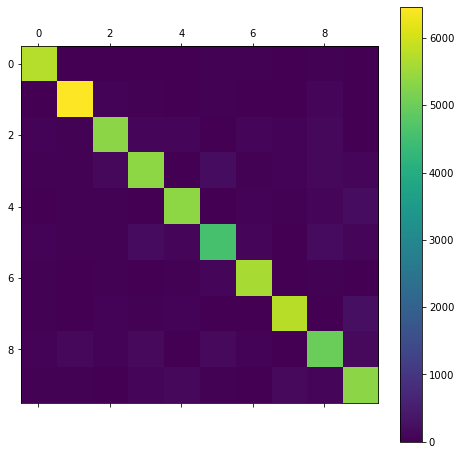

In [56]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

plot_confusion_matrix(conf_mx)
# plt.matshow(conf_mx, cmap=plt.cm.gray)
# plt.show()


# 5.多标签分类器

In [62]:
# 到目前位置，每个实例都只有一个输出，但某些情况下，我们需要分类器为每个实例产出多个类别，比如，为照片中的每个人脸附上一个标签。
# 假设分类器经过训练，已经可以识别三张脸 A B C，那么当看到A和C的合照时，应该输出[1,0,1]，这种输出多个二元标签的分类系统成为多标签分类系统
# 下面以k近邻算法为例(不是所有的分类器都支持多标签)

from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 ==1)
y_multilabel =  np.c_[y_train_large,y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)

knn_clf.predict(x_test[:1])

array([[ True,  True]])

# 6. 多输出分类器

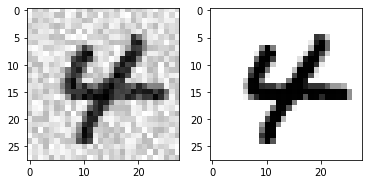

In [64]:
# 最后一种分类任务–多输出多分类任务(简称为多输出分类)。简单而言，它是多标签分类的泛化，其标签也可以是多种类别的(比如有两个以上的值)
# 说明:构建一个去除图片中噪声的系统。给它输入一个带噪声的图片，它将(希望)输出一张干净的数字图片，跟其他MNIST图片一样，以像素强度的一个数组作为呈现方式。
# 需要注意的是：这个分类器的输出时多个标签(一个像素点一个标签),每一个标签有多个值(0-255)。所以这是一个多输出分类器系统的例子。

# 首先还是从创建训练集和测试集开始，使用Numpy的randint 来给Mnist图片的像素强度增加噪声。目标是将图片还原为原始图片。

noise = np.random.randint(0, 100, (len(x_train), 784))
x_train_mod = x_train + noise

noise = np.random.randint(0, 100, (len(x_test), 784))
x_test_mod = x_test + noise

y_train_mod = x_train
y_test_mod = x_test

some_index = 5500
plt.subplot(121); plot_digit(x_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()



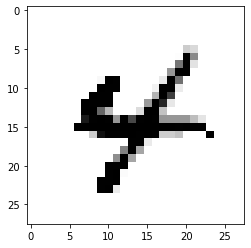

In [65]:
knn_clf.fit(x_train_mod, y_train_mod)
clean_digit = knn_clf.predict([x_test_mod[some_index]])
plot_digit(clean_digit)
